In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.metrics import roc_curve

In [56]:
df = pd.read_csv("E:\Data\Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [57]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [58]:
df["Gender"] = df["Gender"].replace(['Male'],1)
df["Gender"] = df["Gender"].replace(['Female'],2)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [60]:
df_data = df.iloc[:, 1:4]
df_target = df.loc[: ,['Purchased']]

In [61]:
df_data

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,2,26,43000
3,2,27,57000
4,1,19,76000
...,...,...,...
395,2,46,41000
396,1,51,23000
397,2,50,20000
398,1,36,33000


In [62]:
df_target

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [63]:
X_train,X_test,Y_train,Y_test = train_test_split(df_data, df_target, train_size=0.7)

In [64]:
DT = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
DT.fit(X_train, Y_train)
y_pred_DT = DT.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred_DT)
cm

array([[73,  7],
       [ 7, 33]], dtype=int64)

<AxesSubplot:>

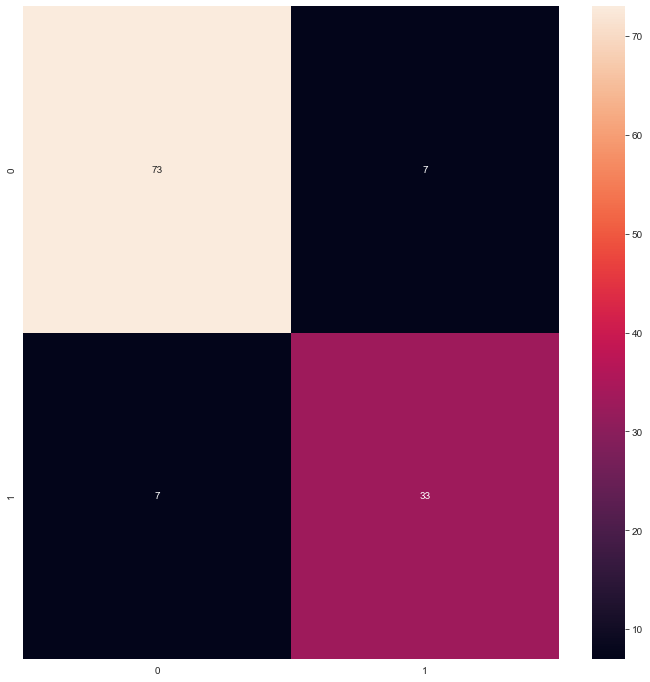

In [71]:
plt.figure(figsize = (12,12))
sns.heatmap(cm, annot=True)

In [66]:
reg = linear_model.LogisticRegression()
reg.fit(X_train, Y_train)

y_pred_reg = pd.DataFrame(reg.predict(X_test))

C:\Users\Danish Iqbal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [67]:
cm1 = confusion_matrix(Y_test, y_pred_reg)
cm1

array([[80,  0],
       [40,  0]], dtype=int64)

<AxesSubplot:>

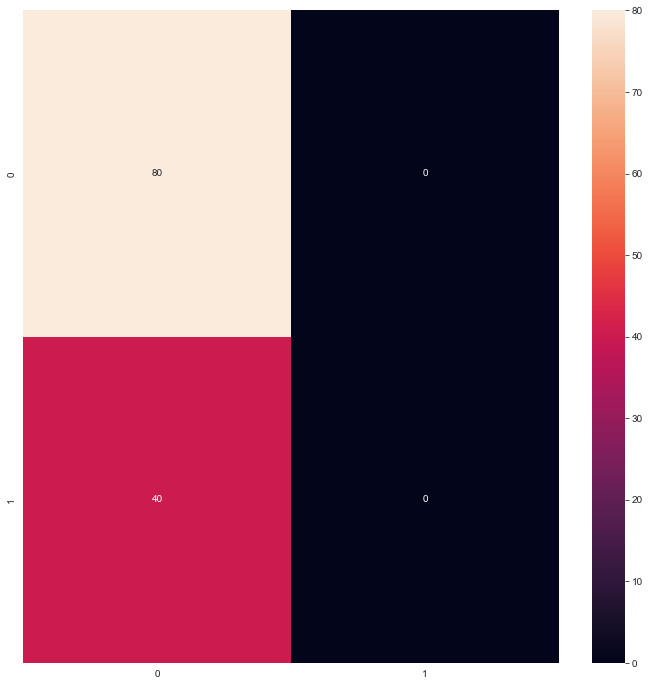

In [68]:
plt.figure(figsize = (12,12))
sns.heatmap(cm1, annot=True)

In [69]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
y_pred_knn = pd.DataFrame(knn.predict(X_test))

C:\Users\Danish Iqbal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [70]:
cm2 = confusion_matrix(Y_test, y_pred_knn)
cm2

array([[72,  8],
       [19, 21]], dtype=int64)

<AxesSubplot:>

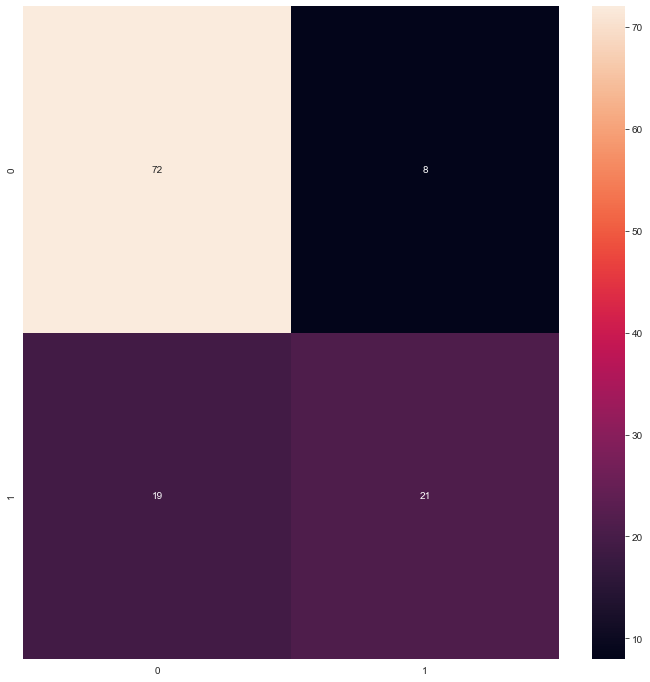

In [72]:
plt.figure(figsize = (12,12))
sns.heatmap(cm2, annot=True)

In [73]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

y_pred_nb = pd.DataFrame(nb.predict(X_test))

C:\Users\Danish Iqbal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [76]:
cm3 = confusion_matrix(Y_test, y_pred_nb)
cm3

array([[76,  4],
       [10, 30]], dtype=int64)

<AxesSubplot:>

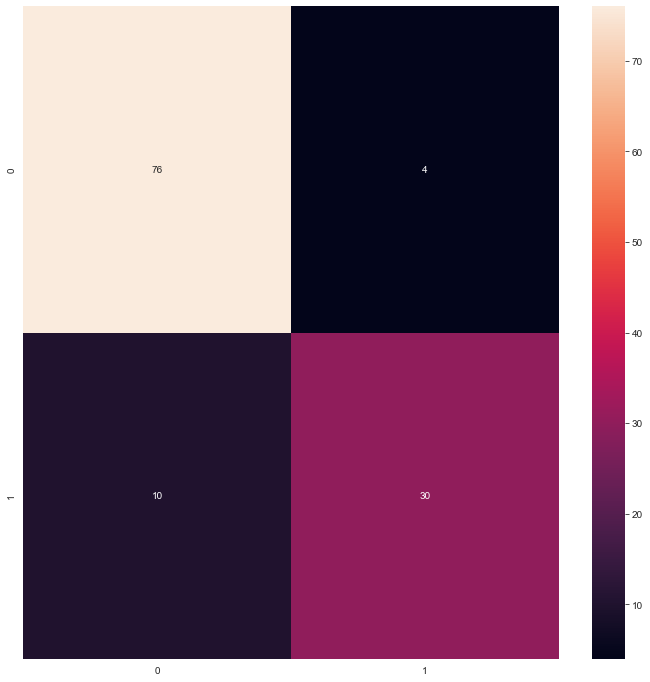

In [77]:
plt.figure(figsize = (12,12))
sns.heatmap(cm3, annot=True)

In [78]:
km = KMeans()
km.fit(X_train, Y_train)

y_pred_km = pd.DataFrame(km.predict(X_test))

In [79]:
cm4 = confusion_matrix(Y_test, y_pred_km)
cm4

array([[16, 18,  1, 19,  1, 13, 11,  1],
       [ 9,  6,  4,  3,  3,  6,  3,  6],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

<AxesSubplot:>

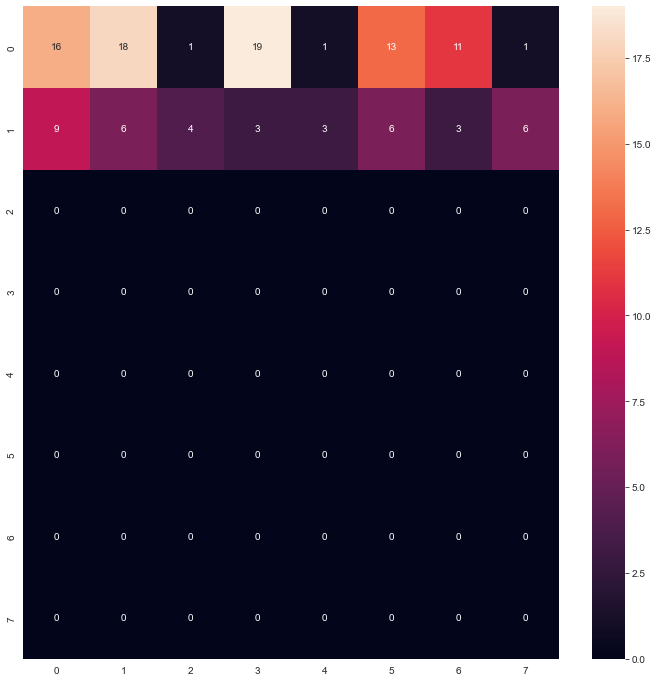

In [80]:
plt.figure(figsize = (12,12))
sns.heatmap(cm4, annot=True)

In [83]:
fpr_y_pred_DT, tpr_y_pred_DT, _ = roc_curve(Y_test, y_pred_DT)
fpr_y_pred_knn , tpr_y_pred_knn, _ = roc_curve(Y_test, y_pred_knn)
fpr_y_pred_reg , tpr_y_pred_reg, _ = roc_curve(Y_test, y_pred_reg)
fpr_y_pred_km , tpr_y_pred_km, _ = roc_curve(Y_test, y_pred_km)
fpr_y_pred_nb , tpr_y_pred_nb, _ = roc_curve(Y_test, y_pred_nb)

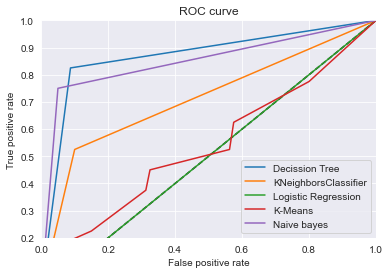

In [84]:
plt.figure(2)
plt.xlim(0, 1)
plt.ylim(0.2, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_y_pred_DT, tpr_y_pred_DT, label='Decission Tree')
plt.plot(fpr_y_pred_knn, tpr_y_pred_knn, label='KNeighborsClassifier')
plt.plot(fpr_y_pred_reg, tpr_y_pred_reg, label='Logistic Regression')
plt.plot(fpr_y_pred_km , tpr_y_pred_km, label='K-Means')
plt.plot(fpr_y_pred_nb, tpr_y_pred_nb, label='Naive bayes')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()